In [4]:
cd ..

/home/btech/2022/krish.kahnani22b/IITGN


#### Creating the Directory structure of the dataset

In [ ]:
import os
import random
import shutil
from pathlib import Path

def split_dataset(images_dir, labels_dir, output_dir, train_ratio=0.7, test_ratio=0.2, val_ratio=0.1):
    output_dir = Path(output_dir)
    for split in ['train', 'test', 'val']:
        (output_dir / split / 'images').mkdir(parents=True, exist_ok=True)
        (output_dir / split / 'labels').mkdir(parents=True, exist_ok=True)

    image_files = [f for f in os.listdir(images_dir) if f.endswith('.jpg')]
    total_files = len(image_files)

    random.shuffle(image_files)

    train_size = int(total_files * train_ratio)
    test_size = int(total_files * test_ratio)
    val_size = total_files - train_size - test_size  

    train_files = image_files[:train_size]
    test_files = image_files[train_size:train_size + test_size]
    val_files = image_files[train_size + test_size:]

    def copy_files(file_list, split_name):
        for file_name in file_list:
            src_img = os.path.join(images_dir, file_name)
            dst_img = output_dir / split_name / 'images' / file_name
            shutil.copy2(src_img, dst_img)

            label_name = file_name.replace('.jpg', '.txt')
            src_label = os.path.join(labels_dir, label_name)
            dst_label = output_dir / split_name / 'labels' / label_name
            if os.path.exists(src_label):
                shutil.copy2(src_label, dst_label)
            else:
                print(f"Label file {label_name} not found for {file_name}")

    print(f"Total files: {total_files}")
    print(f"Training set: {len(train_files)} files")
    print(f"Test set: {len(test_files)} files")
    print(f"Validation set: {len(val_files)} files")

    copy_files(train_files, 'train')
    copy_files(test_files, 'test')
    copy_files(val_files, 'val')

    print("Dataset splitting completed!")

images_dir = "DatasetCOCO/images"
labels_dir = "DatasetCOCO/labels"
output_dir = "DatasetYOLO"

split_dataset(images_dir, labels_dir, output_dir)


In [1]:
# Initially, we have DatasetCOCO which contains list of images and labels

# ├── DatasetCOCO
# │   ├── images
# │   └── labels

# We create a a directory structure with train/test/val split in DatasetYOLO

# ├── DatasetYOLO
# │   ├── code.ipynb
# │   ├── data.yaml
# │   ├── images
# │      ├── test
# │      ├── train
# │      └── val
# │   ├── labels
# │      ├── test
# │      ├── train
# │      └── val

#### Data Cleaning 

In [10]:
'''
Since we have only one class (Solar_panel) so class label should only be 0,
 just checking if there is any label.txt file which contains classes other than 0
'''
import os

label_dirs = ["DatasetYOLO/labels/train", "DatasetYOLO/labels/val", "DatasetYOLO/labels/test"]

def check_labels(label_dirs):
    for label_dir in label_dirs:
        for label_file in os.listdir(label_dir):
            label_path = os.path.join(label_dir, label_file)
            with open(label_path, "r") as file:
                lines = file.readlines()
                for line in lines:
                    parts = line.strip().split()
                    if len(parts) < 5:
                        print(f"Invalid format in {label_path}: {line}")
                        continue
                    class_idx = int(parts[0])
                    if class_idx != 0:  
                        print(f"Invalid class index {class_idx} in {label_path} (expected 0)")

check_labels(label_dirs)

In [11]:
# Many labels were found with class 1 and class 2 annotations,
# Removing all such rows which start with either 1 or 2 for each label.txt file 
import os

base_label_dir = "DatasetYOLO/labels"

folders = ["train", "test", "val"]

for folder in folders:
    label_dir = os.path.join(base_label_dir, folder)
    
    for filename in os.listdir(label_dir):
        file_path = os.path.join(label_dir, filename)

        with open(file_path, "r") as file:
            lines = file.readlines()

        new_lines = [line for line in lines if not line.strip().startswith(("1 ", "2 "))]

        with open(file_path, "w") as file:
            file.writelines(new_lines)

        if len(new_lines) != len(lines):
            print(f"Updated: {os.path.join(folder, filename)}")

# Data Exploration and Understanding

How Many Instances of Solar Panels?

Approach : As there is only one class throughout the dataset, so just counting the number of annotations of each file and adding them.

In [6]:
import os

def count_instances(label_dir):
    total_instances = 0
    for root, _, files in os.walk(label_dir):
        for file in files:
            if file.endswith('.txt'):
                with open(os.path.join(root, file), 'r') as f:
                    total_instances += len(f.readlines())
    return total_instances

label_dirs = ['DatasetYOLO/labels/train', 'DatasetYOLO/labels/val', 'DatasetYOLO/labels/test']
total_instances = sum(count_instances(dir) for dir in label_dirs)
print(f"Total number of solar panel instances: {total_instances}")

Total number of solar panel instances: 29267


In [15]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


Value counts of labels per image:
Images with 0 labels: 14
Images with 1 labels: 83
Images with 2 labels: 175
Images with 3 labels: 229
Images with 4 labels: 234
Images with 5 labels: 214
Images with 6 labels: 169
Images with 7 labels: 176
Images with 8 labels: 184
Images with 9 labels: 151
Images with 10 labels: 117
Images with 11 labels: 97
Images with 12 labels: 84
Images with 13 labels: 75
Images with 14 labels: 45
Images with 15 labels: 44
Images with 16 labels: 42
Images with 17 labels: 30
Images with 18 labels: 21
Images with 19 labels: 30
Images with 20 labels: 14
Images with 21 labels: 4
Images with 23 labels: 4
Images with 24 labels: 2
Images with 25 labels: 4
Images with 26 labels: 3
Images with 27 labels: 5
Images with 28 labels: 5
Images with 29 labels: 15
Images with 30 labels: 20
Images with 31 labels: 8
Images with 32 labels: 7
Images with 33 labels: 13
Images with 34 labels: 19
Images with 35 labels: 10
Images with 36 labels: 6
Images with 37 labels: 17
Images with 38 

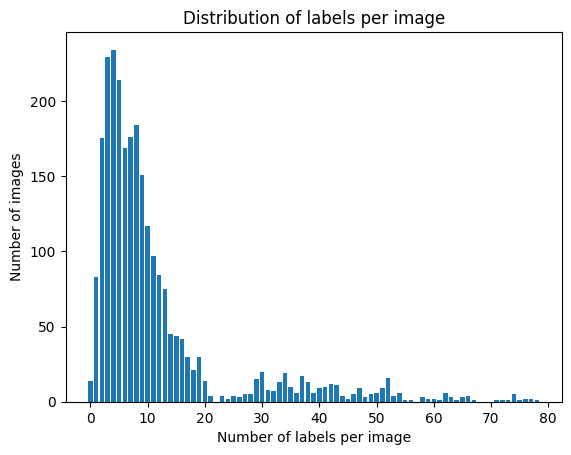

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

def labels_per_image(label_dir):
    counts = []
    for root, _, files in os.walk(label_dir):
        for file in files:
            if file.endswith('.txt'):
                with open(os.path.join(root, file), 'r') as f:
                    counts.append(len(f.readlines()))
    return counts

all_counts = []
for dir in label_dirs:
    all_counts.extend(labels_per_image(dir))

label_counts = Counter(all_counts)
print("Value counts of labels per image:")
for num_labels, count in sorted(label_counts.items()):
    print(f"Images with {num_labels} labels: {count}")


sorted_counts = sorted(label_counts.items())
num_labels = [item[0] for item in sorted_counts]
counts = [item[1] for item in sorted_counts]

plt.bar(num_labels, counts)

plt.xlabel('Number of labels per image')
plt.ylabel('Number of images')
plt.title('Distribution of labels per image')

plt.show()

### Area

The dataset provides labels in YOLTv4 format (category, x-center, y-center, x-width, y-width), where the x-width and y-width are normalized by the chip size (416x416 pixels for 31 cm native resolution images). The native resolution is 31 cm per pixel, which allows us to convert pixel-based measurements to physical units (meters).

#### Area (m²)=(x_width×416×0.31)×(y_width×416×0.31)

Mean Area: 161.63 m²
Standard Deviation: 285.58 m²


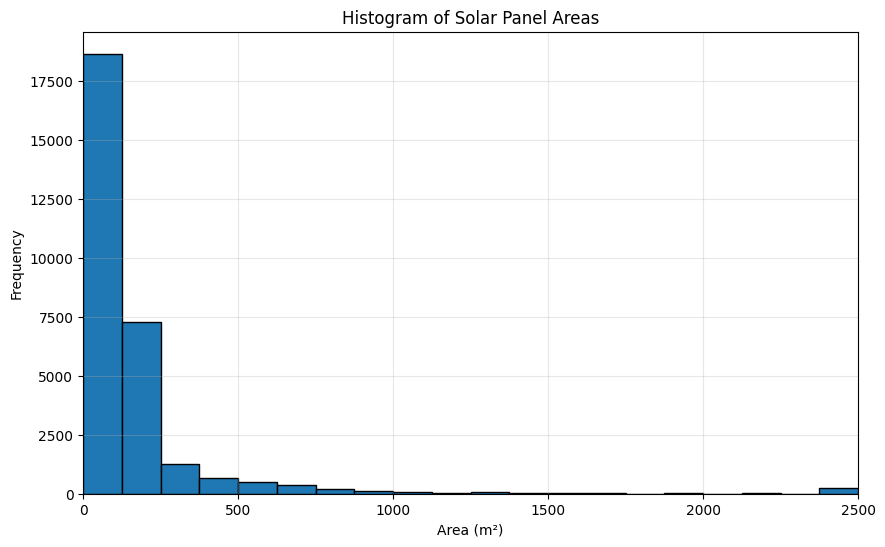

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import os

CHIP_SIZE = 416  # pixels (native resolution chip size)
RESOLUTION = 0.31  # meters per pixel
AREA_CONVERSION_FACTOR = (CHIP_SIZE * RESOLUTION) ** 2  
MAX_AREA = 2500 

def compute_area(x_width, y_width):
    width_m = x_width * CHIP_SIZE * RESOLUTION
    height_m = y_width * CHIP_SIZE * RESOLUTION
    area_m2 = width_m * height_m
    return min(area_m2, MAX_AREA)

def read_labels_from_file(file_path):
    areas = []
    with open(file_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) == 5: 
                x_width = float(parts[3])
                y_width = float(parts[4])
                area = compute_area(x_width, y_width)
                areas.append(area)
    return areas


label_dir = "DatasetCOCO/labels" 
all_areas = []
for label_file in os.listdir(label_dir):
    if label_file.endswith(".txt"):
        file_path = os.path.join(label_dir, label_file)
        areas = read_labels_from_file(file_path)
        all_areas.extend(areas)

if not all_areas:
    print("No areas were calculated. Check if the directory contains valid .txt files.")
else:
    all_areas = [area for area in all_areas if 0 <= area <= MAX_AREA]

    mean_area = np.mean(all_areas)
    std_dev_area = np.std(all_areas, ddof=1)  

    print(f"Mean Area: {mean_area:.2f} m²")
    print(f"Standard Deviation: {std_dev_area:.2f} m²")

    plt.figure(figsize=(10, 6))
    plt.hist(all_areas, bins=20, edgecolor='black', range=(0, MAX_AREA))
    plt.title('Histogram of Solar Panel Areas')
    plt.xlabel('Area (m²)')
    plt.ylabel('Frequency')
    plt.xlim(0, MAX_AREA) 
    plt.grid(True, alpha=0.3)
    plt.show()

### Intersection Over Union (IOU) using shapely and supervision

In [14]:
from shapely.geometry import box
import numpy as np
import supervision as sv

def yolo_to_xyxy(bbox, img_width, img_height):
    """
    Converts (x_center, y_center, width, height) to (x_min, y_min, x_max, y_max) in pixel coordinates.
    """
    x_center, y_center, width, height = bbox
    x_center *= img_width
    y_center *= img_height
    width *= img_width
    height *= img_height

    x_min = x_center - width / 2
    y_min = y_center - height / 2
    x_max = x_center + width / 2
    y_max = y_center + height / 2

    return (x_min, y_min, x_max, y_max)

def compute_iou_shapely(bbox1, bbox2, img_width, img_height):
    """
    Computes Intersection over Union (IoU) using Shapely.
    """
    x1_min, y1_min, x1_max, y1_max = yolo_to_xyxy(bbox1, img_width, img_height)
    x2_min, y2_min, x2_max, y2_max = yolo_to_xyxy(bbox2, img_width, img_height)

    box1 = box(x1_min, y1_min, x1_max, y1_max)
    box2 = box(x2_min, y2_min, x2_max, y2_max)

    intersection_area = box1.intersection(box2).area
    union_area = box1.union(box2).area
    
    iou = intersection_area / union_area if union_area > 0 else 0
    return iou

# Ground truth labels of an image
ground_truth = [
    [0.3653846153846154, 0.020432692307692308, 0.09615384615384616, 0.040865384615384616],
    [0.46995192307692313, 0.018028846153846156, 0.06009615384615385, 0.03605769230769231],
    [0.2776442307692308, 0.15625, 0.026442307692307696, 0.02403846153846154],
    [0.4567307692307693, 0.6153846153846154, 0.02403846153846154, 0.028846153846153848],
    [0.671875, 0.9819711538461539, 0.040865384615384616, 0.03605769230769231]
]

# Predicted boxes
predictions = [
    [0.375, 0.025, 0.090, 0.045],
    [0.475, 0.020, 0.055, 0.040],
    [0.280, 0.160, 0.030, 0.020],
    [0.460, 0.620, 0.025, 0.030],
    [0.675, 0.985, 0.045, 0.035]
]

IMG_WIDTH = 416
IMG_HEIGHT = 416

print("IoU Comparison (Shapely vs Supervision):")
for i, (gt, pred) in enumerate(zip(ground_truth, predictions)):
    # Shapely IoU
    iou_shapely = compute_iou_shapely(gt, pred, IMG_WIDTH, IMG_HEIGHT)
    
    # Supervision IoU
    gt_xyxy = np.array([yolo_to_xyxy(gt, IMG_WIDTH, IMG_HEIGHT)])
    pred_xyxy = np.array([yolo_to_xyxy(pred, IMG_WIDTH, IMG_HEIGHT)])
    detections_gt = sv.Detections(xyxy=gt_xyxy)
    detections_pred = sv.Detections(xyxy=pred_xyxy)
    iou_supervision = sv.box_iou_batch(detections_gt.xyxy, detections_pred.xyxy)[0][0]
    
    print(f"Box {i + 1}:")
    print(f"  Ground Truth: {gt}")
    print(f"  Prediction: {pred}")
    print(f"  Shapely IoU: {iou_shapely:.4f}")
    print(f"  Supervision IoU: {iou_supervision:.4f}")
    print(f"  Difference: {abs(iou_shapely - iou_supervision):.6f}\n")

IoU Comparison (Shapely vs Supervision):
Box 1:
  Ground Truth: [0.3653846153846154, 0.020432692307692308, 0.09615384615384616, 0.040865384615384616]
  Prediction: [0.375, 0.025, 0.09, 0.045]
  Shapely IoU: 0.6703
  Supervision IoU: 0.6703
  Difference: 0.000000

Box 2:
  Ground Truth: [0.46995192307692313, 0.018028846153846156, 0.06009615384615385, 0.03605769230769231]
  Prediction: [0.475, 0.02, 0.055, 0.04]
  Shapely IoU: 0.7652
  Supervision IoU: 0.7652
  Difference: 0.000000

Box 3:
  Ground Truth: [0.2776442307692308, 0.15625, 0.026442307692307696, 0.02403846153846154]
  Prediction: [0.28, 0.16, 0.03, 0.02]
  Shapely IoU: 0.6192
  Supervision IoU: 0.6192
  Difference: 0.000000

Box 4:
  Ground Truth: [0.4567307692307693, 0.6153846153846154, 0.02403846153846154, 0.028846153846153848]
  Prediction: [0.46, 0.62, 0.025, 0.03]
  Shapely IoU: 0.5753
  Supervision IoU: 0.5753
  Difference: 0.000000

Box 5:
  Ground Truth: [0.671875, 0.9819711538461539, 0.040865384615384616, 0.0360576923

The Pascal VOC 11-Point Interpolation Method  works by

Evaluating precision at 11 recall levels (0.0, 0.1, ..., 1.0). 

The precision at each recall level is computed as the maximum precision at that recall level or higher

### Pascal VOC 11-Point Interpolation Method for Average Precison

In [11]:
def compute_precision_recall(pred_boxes, gt_boxes, iou_threshold, img_width, img_height):
    num_preds = len(pred_boxes)
    num_gt = len(gt_boxes)
    tp = np.zeros(num_preds)
    fp = np.zeros(num_preds)
    gt_matched = np.zeros(num_gt)

    iou_matrix = np.zeros((num_preds, num_gt))
    for i, pred in enumerate(pred_boxes):
        for j, gt in enumerate(gt_boxes):
            iou_matrix[i, j] = compute_iou_shapely(pred, gt, img_width, img_height)

    # Sort predictions by confidence
    indices = np.arange(num_preds) 

    # Match predictions to ground truth
    for i in indices:
        max_iou = np.max(iou_matrix[i])
        if max_iou >= iou_threshold:
            j = np.argmax(iou_matrix[i])
            if not gt_matched[j]:  # If GT not yet matched
                tp[i] = 1
                gt_matched[j] = 1
            else:
                fp[i] = 1  # Already matched GT
        else:
            fp[i] = 1

    # Cumulative TP and FP
    tp_cum = np.cumsum(tp)
    fp_cum = np.cumsum(fp)
    precision = tp_cum / (tp_cum + fp_cum)
    recall = tp_cum / num_gt if num_gt > 0 else np.zeros_like(tp_cum)
    return precision, recall

In [12]:
def compute_ap_pascal_voc_11_point(pred_boxes, gt_boxes, iou_threshold, img_width, img_height):
    precision, recall = compute_precision_recall(pred_boxes, gt_boxes, iou_threshold, img_width, img_height)
    recall_levels = np.linspace(0, 1, 11)
    interpolated_precision = np.zeros(11)
    for i, r in enumerate(recall_levels):
        valid = recall >= r
        interpolated_precision[i] = np.max(precision[valid]) if np.any(valid) else 0
    return np.mean(interpolated_precision)

### COCO 101-Point Interpolation Method
Uses 101 recall levels: {0.00, 0.01, 0.02, ..., 1.00}.

Similar to Pascal VOC, but with finer recall granularity.

Computes AP as the mean of 101 interpolated precision values.

In [13]:
def compute_ap_coco_101_point(pred_boxes, gt_boxes, iou_threshold, img_width, img_height):
    precision, recall = compute_precision_recall(pred_boxes, gt_boxes, iou_threshold, img_width, img_height)
    recall_levels = np.linspace(0, 1, 101)
    interpolated_precision = np.zeros(101)
    for i, r in enumerate(recall_levels):
        valid = recall >= r
        interpolated_precision[i] = np.max(precision[valid]) if np.any(valid) else 0
    return np.mean(interpolated_precision)

#### Area under the precision-recall curve using trapezoidal integration. 

1/2 *(sum of parallel sides) * (Distance between them)

In [18]:
def compute_ap_auc(pred_boxes, gt_boxes, iou_threshold, img_width, img_height):
    precision, recall = compute_precision_recall(pred_boxes, gt_boxes, iou_threshold, img_width, img_height)
    precision = np.concatenate([[0], precision, [0]])
    recall = np.concatenate([[0], recall, [1]])
    order = np.argsort(recall)
    precision = precision[order]
    recall = recall[order]
    return np.trapz(precision, recall)

#### Generate 10 images (100x100), each with 10 ground truth and 10 predicted 20x20 boxes.

In [ ]:
def generate_boxes(num_images, img_size=100, box_size=20, num_boxes=10):
    images_data = []
    for _ in range(num_images):
        gt_boxes = []
        pred_boxes = []
        for _ in range(num_boxes):
            x = np.random.uniform(0, img_size - box_size)
            y = np.random.uniform(0, img_size - box_size)
            gt_boxes.append([x + box_size/2, y + box_size/2, box_size, box_size])  # YOLO format in pixels
            
        for gt in gt_boxes:
            offset_x = np.random.uniform(-5, 5)
            offset_y = np.random.uniform(-5, 5)
            pred_boxes.append([gt[0] + offset_x, gt[1] + offset_y, box_size, box_size])
        images_data.append((gt_boxes, pred_boxes))
    return images_data

np.random.seed(42)  
images_data = generate_boxes(10)

### Comparison of AP@0.5 from all three methods

In [19]:
# Compute AP@0.5 for each image and method
np.random.seed(42)
images_data = generate_boxes(10)
iou_threshold = 0.5
img_width, img_height = 100, 100
ap_voc_list, ap_coco_list, ap_auc_list = [], [], []

for i, (gt_boxes, pred_boxes) in enumerate(images_data):
    ap_voc = compute_ap_pascal_voc_11_point(pred_boxes, gt_boxes, iou_threshold, img_width, img_height)
    ap_coco = compute_ap_coco_101_point(pred_boxes, gt_boxes, iou_threshold, img_width, img_height)
    ap_auc = compute_ap_auc(pred_boxes, gt_boxes, iou_threshold, img_width, img_height)
    
    ap_voc_list.append(ap_voc)
    ap_coco_list.append(ap_coco)
    ap_auc_list.append(ap_auc)
    
    print(f"Image {i + 1}:")
    print(f" AP@0.5 (Pascal VOC 11-point): {ap_voc:.4f}")
    print(f" AP@0.5 (COCO 101-point): {ap_coco:.4f}")
    print(f" AP@0.5 (AUC): {ap_auc:.4f}\n")

mean_ap_voc = np.mean(ap_voc_list)
mean_ap_coco = np.mean(ap_coco_list)
mean_ap_auc = np.mean(ap_auc_list)

print("Mean AP@0.5 Across 10 Images:")
print(f" Pascal VOC 11-point: {mean_ap_voc:.4f}")
print(f" COCO 101-point: {mean_ap_coco:.4f}")
print(f" AUC: {mean_ap_auc:.4f}")

Image 1:
 AP@0.5 (Pascal VOC 11-point): 0.7636
 AP@0.5 (COCO 101-point): 0.7624
 AP@0.5 (AUC): 0.7853

Image 2:
 AP@0.5 (Pascal VOC 11-point): 0.7485
 AP@0.5 (COCO 101-point): 0.7261
 AP@0.5 (AUC): 0.7402

Image 3:
 AP@0.5 (Pascal VOC 11-point): 0.8727
 AP@0.5 (COCO 101-point): 0.8713
 AP@0.5 (AUC): 0.8592

Image 4:
 AP@0.5 (Pascal VOC 11-point): 0.7247
 AP@0.5 (COCO 101-point): 0.7199
 AP@0.5 (AUC): 0.7290

Image 5:
 AP@0.5 (Pascal VOC 11-point): 0.6909
 AP@0.5 (COCO 101-point): 0.6634
 AP@0.5 (AUC): 0.6342

Image 6:
 AP@0.5 (Pascal VOC 11-point): 0.8818
 AP@0.5 (COCO 101-point): 0.8802
 AP@0.5 (AUC): 0.8726

Image 7:
 AP@0.5 (Pascal VOC 11-point): 0.8727
 AP@0.5 (COCO 101-point): 0.8713
 AP@0.5 (AUC): 0.8592

Image 8:
 AP@0.5 (Pascal VOC 11-point): 0.8727
 AP@0.5 (COCO 101-point): 0.8713
 AP@0.5 (AUC): 0.8592

Image 9:
 AP@0.5 (Pascal VOC 11-point): 0.8818
 AP@0.5 (COCO 101-point): 0.8802
 AP@0.5 (AUC): 0.8726

Image 10:
 AP@0.5 (Pascal VOC 11-point): 1.0000
 AP@0.5 (COCO 101-point):

## Building Object Detection Model

#### Experiment 1:
Tried base YOLOv8n (nano) model for object detection with default hyperparameters

**metrics/mAP50(B)** -> 0.98228

**metrics/mAP50-95(B)** -> 0.77991

**precision(B)** -> 0.96827

**recall(B)** -> 0.94998

(Detailed results in results.csv)

In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")  

results = model.train(
    data="data.yaml",
    epochs=100,          
    imgsz=832,          
    batch=16,
    
)
metrics = model.val()

print(f"Best mAP50: {metrics.box.map50}")
print(f"Best mAP50-95: {metrics.box.map}")

#### Experiment 2:
Tried YOLOv8n (nano) model for object detection with some hyperparameter tuning to improve results

- **Model**: YOLOv8n (nano variant), initialized with pretrained weights (`yolov8n.pt`).
- **Epochs**: 50 epochs
- **Batch Size**: 16 
- **Optimizer**: Auto-selected (`optimizer: auto`), with initial learning rate 0.01 (`lr0`), final learning rate factor 0.01 (`lrf`).
- **Data Augmentation**:
  - HSV adjustments: Hue 0.015, Saturation 0.7, Value 0.4.
  - Random translation: 0.1, scaling: 0.5, horizontal flip probability: 0.5.

Improvement

**mAP50(B)**: 0.98304 – Marginal improvement over Experiment 1.

**mAP50-95(B)** : 0.85081 – Notable improvement, suggesting better generalization across IoU thresholds.

Similar Mean Average Precision as in experiment 1
Better Mean Average Precision for IOU threshold lying between 50-95 

In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")  

results = model.train(
    data="data.yaml",
    epochs=50,         
    imgsz=832,          
    batch=16,
    
    degrees=10.0,       # Random rotation
    fliplr=0.5,        # Random horizontal flip
    scale=0.9,         # Random scaling
    
    patience=15,        # Early stopping
    lr0=0.01,          # Initial learning rate
    lrf=0.001,         # Final learning rate
    warmup_epochs=5    # Gradual warmup
)

# Validate the model
metrics = model.val()

print(f"Best mAP50: {metrics.box.map50}")
print(f"Best mAP50-95: {metrics.box.map}")

#### Experiment 3:
Tried base YOLOv8s (small) model for object detection with default hyperparameters


**mAP50(B)**: 0.98861 – Slightly higher than both nano experiments.

**mAP50-95(B)**: 0.84051 – Comparable to Experiment 2, slightly below its 0.85081.

Results were similar to the tuned nano model in Experiment 2, with a small mAP50 boost but no significant mAP50-95 advantage. Given the increased computational cost of YOLOv8s, the nano model remains preferable for efficiency without substantial performance loss.


In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8s.pt")  

results = model.train(
    data="data.yaml",
    epochs=100,          
    imgsz=832,          
    batch=16,
    
)
metrics = model.val()

print(f"Best mAP50: {metrics.box.map50}")
print(f"Best mAP50-95: {metrics.box.map}")

we observed high mAP50 scores (0.98228 to 0.98861), indicating strong detection at IoU=0.5, but mAP50-95 improvements plateaued around 0.84-0.85 despite increasing epochs, tuning hyperparameters (e.g., learning rate, augmentation), and testing a larger model. 

This bottleneck suggests that the model’s capacity to generalize across stricter IoU thresholds (0.5-0.95) is limited not by the architecture or training strategy, but by the quality of the dataset. The most likely culprit is **incorrect annotations**, such as misaligned bounding boxes, inconsistent class labels, or incomplete ground truth data, which prevent the model from achieving higher precision and recall at stricter IoU levels

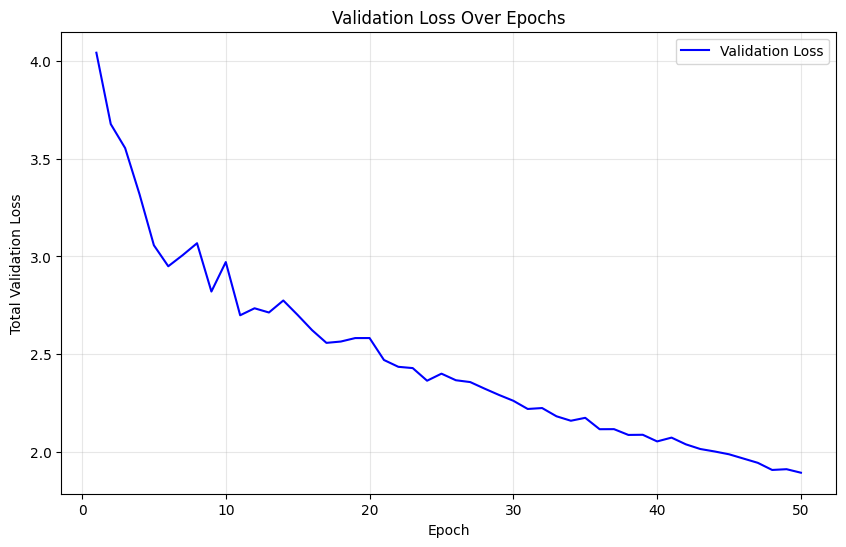

Final Validation Loss: 1.8956
Standard Deviation of Last 10 Epochs: 0.0568


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


csv_path = "runs/detect/YOLOv8n50epochs/results.csv"
results_df = pd.read_csv(csv_path)


results_df['val_total_loss'] = (results_df['val/box_loss'] + 
                               results_df['val/cls_loss'] + 
                               results_df['val/dfl_loss'])


epochs = results_df['epoch']
val_loss = results_df['val_total_loss']


plt.figure(figsize=(10, 6))
plt.plot(epochs, val_loss, label='Validation Loss', color='blue')
plt.title('Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Total Validation Loss')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()




std_last_10 = np.std(last_10_loss)


print(f"Final Validation Loss: {val_loss.iloc[-1]:.4f}")
print(f"Standard Deviation of Last 10 Epochs: {std_last_10:.4f}")

#### Predictions of the model


image 1/1 /home/btech/2022/krish.kahnani22b/IITGN/DatasetYOLO/images/test/solarpanels_native_3__x0_9615_y0_13822_dxdy_416.jpg: 640x640 7 solar_panels, 10.6ms
Speed: 10.5ms preprocess, 10.6ms inference, 15.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/btech/2022/krish.kahnani22b/IITGN/DatasetYOLO/images/test/solarpanels_native_2__x0_11310_y0_15608_dxdy_416.jpg: 640x640 3 solar_panels, 10.8ms
Speed: 8.9ms preprocess, 10.8ms inference, 15.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/btech/2022/krish.kahnani22b/IITGN/DatasetYOLO/images/test/solarpanels_native_1__x0_9021_y0_12093_dxdy_416.jpg: 640x640 10 solar_panels, 10.9ms
Speed: 5.9ms preprocess, 10.9ms inference, 15.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/btech/2022/krish.kahnani22b/IITGN/DatasetYOLO/images/test/solarpanels_native_1__x0_1675_y0_9224_dxdy_416.jpg: 640x640 7 solar_panels, 17.4ms
Speed: 8.0ms preprocess, 17.4ms inference, 15.5ms postprocess per im

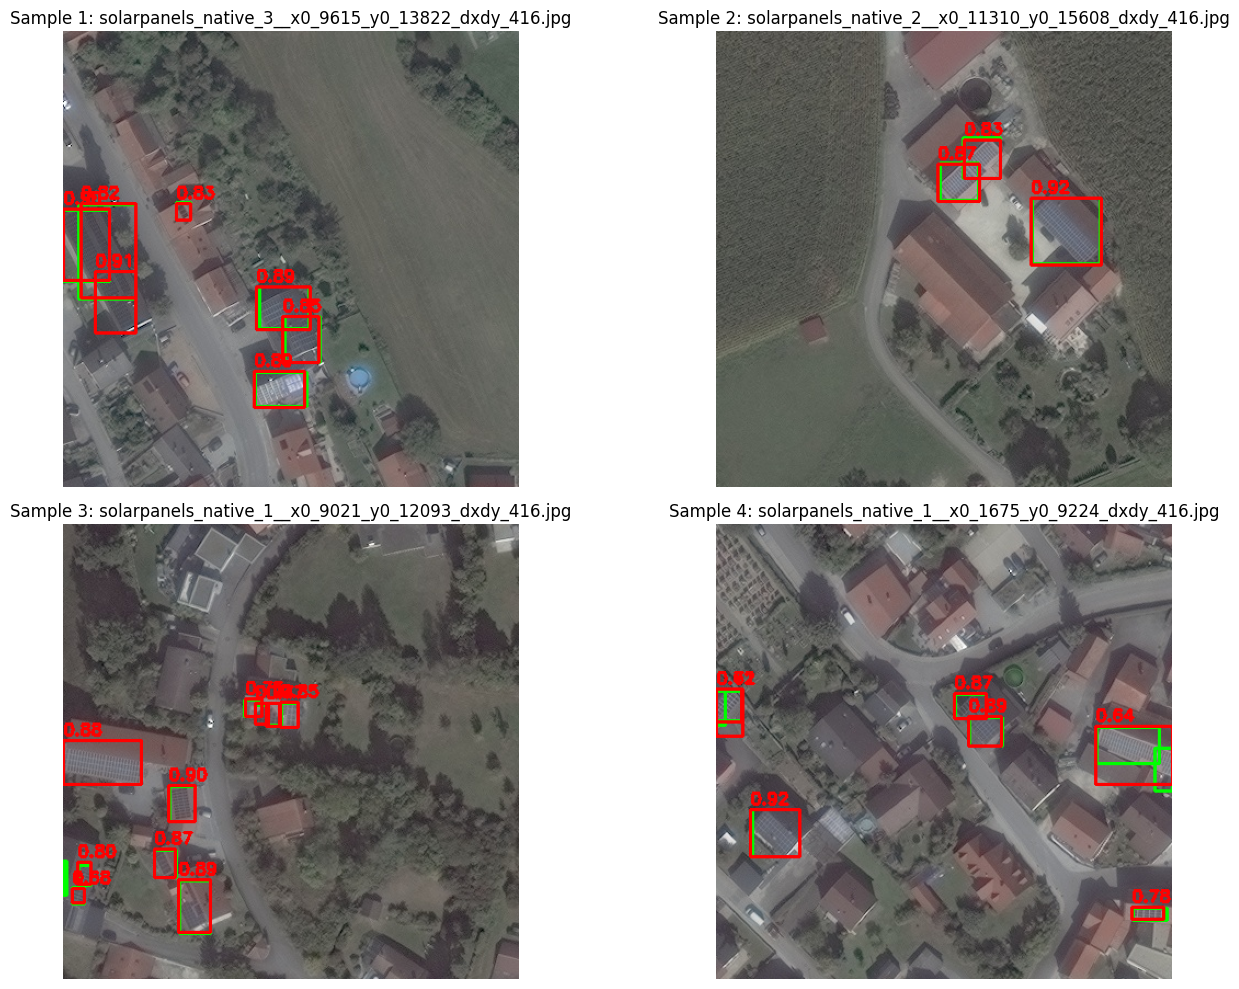

Legend:
- Green: Ground Truth Bounding Boxes
- Red: Predicted Bounding Boxes with Confidence Scores


In [ ]:
import os
import cv2
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt

model = YOLO("runs/detect/YOLOv8n50epochs/weights/best.pt")

test_img_dir = "images/test"
test_label_dir = "labels/test"
test_images = [f for f in os.listdir(test_img_dir) if f.endswith((".jpg"))]

np.random.seed(100)
sample_images = np.random.choice(test_images, 4, replace=False)

def load_yolo_labels(label_path, img_width=416, img_height=416):
    boxes = []
    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) == 5:  # category, x_center, y_center, width, height
                    x_center, y_center, width, height = map(float, parts[1:])
                    x_min = int((x_center - width / 2) * img_width)
                    y_min = int((y_center - height / 2) * img_height)
                    x_max = int((x_center + width / 2) * img_width)
                    y_max = int((y_center + height / 2) * img_height)
                    boxes.append([x_min, y_min, x_max, y_max])
    return boxes

plt.figure(figsize=(15, 10))
for i, img_file in enumerate(sample_images):
    img_path = os.path.join(test_img_dir, img_file)
    label_path = os.path.join(test_label_dir, img_file.replace(".jpg", ".txt").replace(".tif", ".txt"))
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

    gt_boxes = load_yolo_labels(label_path)

    results = model.predict(img_path, conf=0.5)  
    pred_boxes = results[0].boxes.xyxy.cpu().numpy()  # [x_min, y_min, x_max, y_max]
    pred_scores = results[0].boxes.conf.cpu().numpy()

    
    for box in gt_boxes:
        x_min, y_min, x_max, y_max = map(int, box)
        cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)  

    
    for box, score in zip(pred_boxes, pred_scores):
        x_min, y_min, x_max, y_max = map(int, box)
        cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)  
        cv2.putText(img, f"{score:.2f}", (x_min, y_min - 5), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    plt.subplot(2, 2, i + 1)
    plt.imshow(img)
    plt.title(f"Sample {i + 1}: {img_file}")
    plt.axis("off")

plt.tight_layout()
plt.show()

print("- Green: Ground Truth Bounding Boxes")
print("- Red: Predicted Bounding Boxes with Confidence Scores")

In [6]:
pwd

'/home/btech/2022/krish.kahnani22b/IITGN/DatasetYOLO'

In [ ]:
import os
import numpy as np
from ultralytics import YOLO
import supervision as sv
from shapely.geometry import box

# Load model
model = YOLO("runs/detect/YOLOv8n50epochs/weights/best.pt")

# Test directories
test_img_dir = "images/test"
test_label_dir = "labels/test"
test_images = [f for f in os.listdir(test_img_dir) if f.endswith((".jpg", ".tif"))]

# Load ground truth (YOLO format)
def load_yolo_labels(label_path, img_width=416, img_height=416):
    boxes = []
    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) == 5:
                    x_center, y_center, width, height = map(float, parts[1:])
                    x_min = (x_center - width / 2) * img_width
                    y_min = (y_center - height / 2) * img_height
                    x_max = (x_center + width / 2) * img_width
                    y_max = (y_center + height / 2) * img_height
                    boxes.append([x_min, y_min, x_max, y_max])
    return np.array(boxes) if boxes else np.empty((0, 4), dtype=np.float32)

gt_detections = []
pred_detections = []
for img_file in test_images:
    img_path = os.path.join(test_img_dir, img_file)
    label_path = os.path.join(test_label_dir, img_file.replace(".jpg", ".txt"))

    gt_boxes = load_yolo_labels(label_path)
    gt_detections.append(
        sv.Detections(
            xyxy=gt_boxes,
            class_id=np.zeros(len(gt_boxes), dtype=int) if len(gt_boxes) > 0 else np.array([], dtype=int)
        )
    )

    results = model.predict(img_path, conf=0.1)
    pred_boxes = results[0].boxes.xyxy.cpu().numpy()
    pred_conf = results[0].boxes.conf.cpu().numpy()
    pred_class = np.zeros(len(pred_boxes), dtype=int)
    if len(pred_boxes) == 0:
        pred_detections.append(
            sv.Detections(
                xyxy=np.empty((0, 4), dtype=np.float32),
                confidence=np.array([], dtype=np.float32),
                class_id=np.array([], dtype=int)
            )
        )
    else:
        pred_detections.append(
            sv.Detections(xyxy=pred_boxes, confidence=pred_conf, class_id=pred_class)
        )

mean_average_precision = sv.MeanAveragePrecision.from_detections(
    predictions=pred_detections,
    targets=gt_detections
)
mAP50_supervision = mean_average_precision.map50
print(f"mAP50 (Supervision): {mAP50_supervision:.4f}")

def compute_iou_shapely(bbox1, bbox2):
    x1_min, y1_min, x1_max, y1_max = bbox1[:4]  
    x2_min, y2_min, x2_max, y2_max = bbox2[:4]  
    box1 = box(x1_min, y1_min, x1_max, y1_max)
    box2 = box(x2_min, y2_min, x2_max, y2_max)
    intersection_area = box1.intersection(box2).area
    union_area = box1.union(box2).area
    return intersection_area / union_area if union_area > 0 else 0

def compute_ap_coco_101_point(pred_boxes, gt_boxes, iou_threshold):
    num_preds = len(pred_boxes)
    num_gt = len(gt_boxes)
    tp = np.zeros(num_preds)
    fp = np.zeros(num_preds)
    gt_matched = np.zeros(num_gt)

    iou_matrix = np.zeros((num_preds, num_gt))
    for i, pred in enumerate(pred_boxes):
        for j, gt in enumerate(gt_boxes):
            iou_matrix[i, j] = compute_iou_shapely(pred, gt)

    indices = np.argsort([-p[-1] for p in pred_boxes])
    for i in indices:
        max_iou = np.max(iou_matrix[i]) if num_gt > 0 else 0
        if max_iou >= iou_threshold:
            j = np.argmax(iou_matrix[i])
            if not gt_matched[j]:
                tp[i] = 1
                gt_matched[j] = 1
            else:
                fp[i] = 1
        else:
            fp[i] = 1

    tp_cum = np.cumsum(tp)
    fp_cum = np.cumsum(fp)
    precision = tp_cum / (tp_cum + fp_cum + 1e-10)  # Avoid division by zero
    recall = tp_cum / num_gt if num_gt > 0 else np.zeros_like(tp_cum)
    recall_levels = np.linspace(0, 1, 101)
    interpolated_precision = np.zeros(101)
    for i, r in enumerate(recall_levels):
        valid = recall >= r
        interpolated_precision[i] = np.max(precision[valid]) if np.any(valid) else 0
    return np.mean(interpolated_precision)

# Compute mAP50 with my implementation
ap_list = []
for gt_det, pred_det in zip(gt_detections, pred_detections):
    gt_boxes = [list(b) for b in gt_det.xyxy]  # xyxy format
    pred_boxes = (
        [list(b) + [c] for b, c in zip(pred_det.xyxy, pred_det.confidence)]
        if pred_det.confidence is not None
        else []
    )  # xyxy + confidence
    if gt_boxes and pred_boxes:  # Only if both exist
        ap = compute_ap_coco_101_point(pred_boxes, gt_boxes, 0.5)
        ap_list.append(ap)

mAP50_my_impl = np.mean(ap_list) if ap_list else 0
print(f"mAP50 (Scratch implementation of COCO 101-point interpolation): {mAP50_my_impl:.4f}")
print(f"Difference (Supervision - My Impl): {mAP50_supervision - mAP50_my_impl:.4f}")


image 1/1 /home/btech/2022/krish.kahnani22b/IITGN/DatasetYOLO/images/test/solarpanels_native_1__x0_0_y0_6963_dxdy_416.jpg: 640x640 13 solar_panels, 9.3ms


Speed: 5.2ms preprocess, 9.3ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/btech/2022/krish.kahnani22b/IITGN/DatasetYOLO/images/test/solarpanels_native_1__x0_0_y0_7119_dxdy_416.jpg: 640x640 20 solar_panels, 10.2ms
Speed: 7.6ms preprocess, 10.2ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/btech/2022/krish.kahnani22b/IITGN/DatasetYOLO/images/test/solarpanels_native_1__x0_0_y0_7303_dxdy_416.jpg: 640x640 12 solar_panels, 9.7ms
Speed: 4.7ms preprocess, 9.7ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/btech/2022/krish.kahnani22b/IITGN/DatasetYOLO/images/test/solarpanels_native_1__x0_0_y0_7513_dxdy_416.jpg: 640x640 6 solar_panels, 8.9ms
Speed: 5.4ms preprocess, 8.9ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/btech/2022/krish.kahnani22b/IITGN/DatasetYOLO/images/test/solarpanels_native_1__x0_1001_y0_7022_dxdy_416.jpg: 640x640 4 solar_panels,

Issue with supervision.metrics.ConfusionMatrix

While computing Precision, Recall, and F1-scores using Supervision’s ConfusionMatrix for a YOLOv8n model, I encountered near-zero metrics despite a high mAP50 (0.982) from Ultralytics’ validation. Supervision’s ConfusionMatrix consistently reported TP=0, stemming from API mismatches and a flawed manual matching logic that failed to reset per image or sort by confidence, misaligning with the model’s proven performance.

Tried reading supervision's documentation but issue is persistant

---

In [1]:
import supervision as sv
print(sv.__version__)

0.25.1


-------------------------------------------------------**THE END**-------------------------------------------------------------